#### 쌍체 표본 t검정 

- x의 변화에 따라 y의 값이 결정
- x에 변화를 가했을 때 그 x가 변화되어서 추출된 값을 검정(효과가 있는지)
- A반 학생들이 보충수업 후 본 국어 시험점수를 봤을 때 보충수업의 효과가 있는지

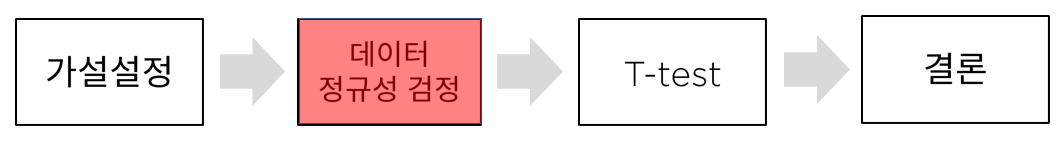

#### 선행조건

- 실험 전과 후의 측정 값(x,y)는 정규분포를 따르지 않아도 됨
- 측정값의 차이는 정규성을 갖고 있어야 함

#### 쌍체표본 t 검정 통계량
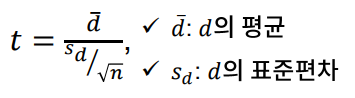

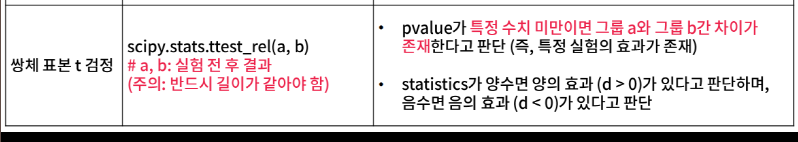

In [1]:
import pandas as pd
df = pd.read_csv("./data/다이어트약_효과검증.csv")

In [2]:
df.columns

Index(['다이어트전(kg)', '다이어트후(kg)'], dtype='object')

In [3]:
df.head()

,다이어트전(kg),다이어트후(kg)
0,87.41,88.30
1,81.05,76.21
2,60.72,53.34
3,81.02,78.21
4,75.75,76.74


In [4]:
before = df['다이어트전(kg)']
after = df['다이어트후(kg)']

In [5]:
before.mean()
after.mean()

69.06360000000001

In [8]:
from scipy.stats import shapiro # 정규성 검정 함수

# 귀무가설 : 데이터는 정규성을 띈다
# 대립가설 : 데이터는 정규성을 띄지 않는다

# 집단간 차이에 대한 정규성을 검정
shapiro(after-before)
shapiro(before-after)

# pvalue가 0.05보다 크므로 귀무가설 채택
# pvalue=0.289

ShapiroResult(statistic=0.9724071621894836, pvalue=0.2892048954963684)

- scipy.stats.ttest_rel(a, b, axis=0, **nan_policy='propagate'**, alternative='two-sided')
    - nan_policy {‘propagate’:nan을 반환, ‘raise’:오류발생, ‘omit’:무시} : NaN 처리 방법
    - alternative='two-sided'|'less'|'greate'

In [12]:
from scipy.stats import *
ttest_rel(after,before) # statistic=-9.70596986565785
# ttest_rel(before,after) # statistic=9.70596986565785
# 두 집단의 분포는 동일하다

# p_value가 0에 가까우므로 귀무가설을 기각
# 통계량이 음수 : 다이어트시 몸무게가 줄었다

Ttest_relResult(statistic=-9.70596986565785, pvalue=5.370404098342324e-13)

In [17]:
### -- 개별실습 (마케팅에 따른 판매액 차이 : htest02d.csv)

In [13]:
df = pd.read_csv("./data/htest02d.csv")

In [14]:
df.head()
df.columns

Index(['before', 'after'], dtype='object')

In [15]:
# 두 집단의 평균 확인
df['before'].mean()
df['after'].mean()

23800.0

In [13]:
# 귀무가설 : 마케팅을 통한 판매액 변화 없음
# 대립가설 : 마케킹을 통해 판매액이 증가함

In [16]:
before = df['before']
after = df['after']

In [17]:
# 정규성 검정 - 두값의 차이가 정규분포를따르는지 확인 
shapiro(after-before)

#pvalue가 유의수준 0.05 이상이므로 귀무가설을 채택(정규분포를 따른다)

ShapiroResult(statistic=0.8882634043693542, pvalue=0.1620953381061554)

In [16]:
ttest_rel(after,before)
# 확실한 양의 효과가 있음을 확인 , pvalue가 0.05보다 작으므로 기각
# 전과 후의 평균은 다르고 통계량은 -이므로 판매액은 증가했다는 것을 알 수 있음

Ttest_relResult(statistic=-3.063706575002505, pvalue=0.013490533567231943)